In [76]:
#!/usr/bin/env python
# coding: utf-8
import jieba
import pandas as pd
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

samgov = pd.read_csv('samgov.csv', encoding='GBK')

### 结巴清洗数据

In [77]:
raw_content = []
for index, row in samgov.iterrows():
    raw_content.append(row['content'])

content = []
for reviews in raw_content:
    
    # use jieba to cut word 
    seg_list = jieba.cut(reviews, cut_all=False) # precision mode
    # instance
    seg_list_instance = list(seg_list)
    content.extend(seg_list_instance)

# load stop word
file = open('cn_stopwords.txt', 'r')
data = file.read()
file.close()
stop_words = data.split('\n')

data = filter(lambda x: x not in stop_words, content)
source = list(data)

In [78]:
print('停用词个数:', len(stop_words))
print('清洗后的词个数:', len(source))

停用词个数: 758
清洗后的词个数: 71331


### 词云

In [79]:
wordfreq ={}
for w in source:
    wordfreq[w] = source.count(w)

In [80]:
# wordfreq
# {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1], reverse=True)}

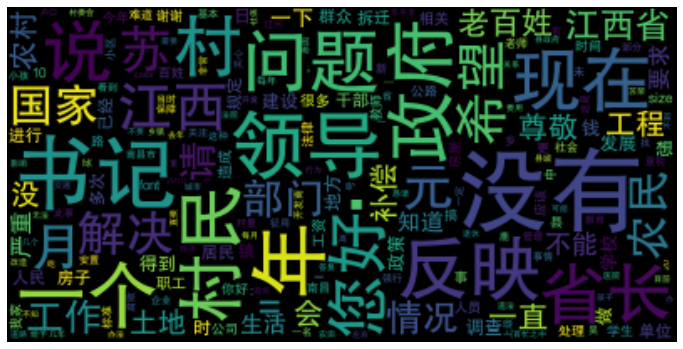

In [96]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='FZHTJW.TTF')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### LDA

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tf = tf_vectorizer.fit_transform(source)
tf_feature_names = tf_vectorizer.get_feature_names()

#### 10个主题

In [83]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [84]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print(display_topics(lda, tf_feature_names, no_top_words))

Topic 0:
一个 书记 您好 江西省 得到 教师 南昌市 安置 一名 给予
Topic 1:
政府 现在 江西 情况 知道 群众 干部 今年 应该 此事
Topic 2:
国家 农民 老百姓 多次 时间 南昌 学生 法律 重视 小孩
Topic 3:
省长 村民 补偿 农村 严重 工资 学校 房屋 相关 社会
Topic 4:
问题 解决 工作 一下 工程 居民 公司 单位 百姓 小区
Topic 5:
领导 一直 拆迁 房子 政策 人员 职工 进行 难道 这是
Topic 6:
没有 尊敬 发展 生活 公路 规定 造成 谢谢 处理 关注
Topic 7:
反映 部门 不能 调查 已经 你好 人民 10 过问 开发商
Topic 8:
希望 土地 很多 地方 非常 50 违法 一定 企业 需要
Topic 9:
建设 要求 管理 老师 孩子 人民政府 看到 留言 原因 办法
None
